In [1]:
sc.defaultParallelism

32

In [8]:
from moztelemetry import get_pings, get_pings_properties, get_newest_ping_per_client
import pandas as pd
import datetime

FRACTION = 1
today = datetime.datetime.now().date()

%matplotlib nbagg

In [9]:
testpilot_pings = get_pings(sc, doc_type="testpilot", app="Firefox", fraction=FRACTION)

In [10]:
testpilot_fields = ["payload/version", "clientId", "meta/submissionDate"]
testpilot_pings_subset = get_pings_properties(testpilot_pings, testpilot_fields)
last_ping_distribution = get_newest_ping_per_client(testpilot_pings_subset)

In [11]:
def submission_date_to_python_date(t):
    old_date = t.get("meta/submissionDate", None)
    if old_date:
        return datetime.datetime.strptime(old_date, "%Y%m%d").date()
    else:
        return None

def days_since_last_ping(t):
    last_ping_date = submission_date_to_python_date(t)
    if last_ping_date:
        days_since_last_ping = (today - last_ping_date).days
    else:
        days_since_last_ping = None
    return (days_since_last_ping)

last_ping_day_counts = last_ping_distribution.map(days_since_last_ping).countByValue()

<IPython.core.display.Javascript object>


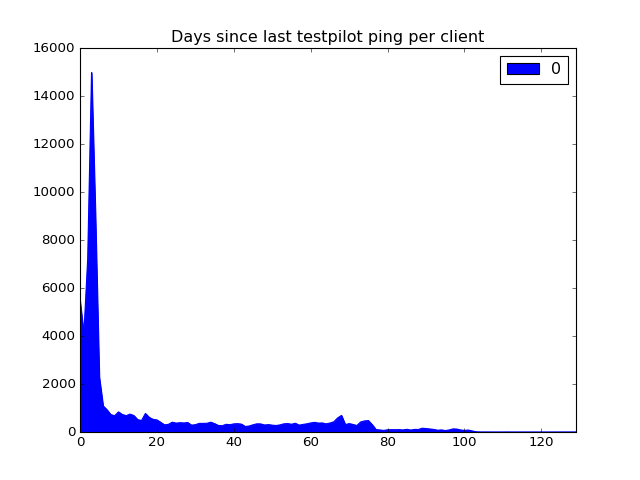

In [12]:
df = pd.DataFrame.from_dict(last_ping_day_counts, 'index')
df.plot(kind='area', title='Days since last testpilot ping per client')